In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import corner
import VBBinaryLensing
VBBL = VBBinaryLensing.VBBinaryLensing()
VBBL.LoadESPLTable("../../../VBBinaryLensing/VBBinaryLensing/data/ESPL.tbl")

mpl.rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20

%matplotlib inline

# Better looking figures
%config InlineBackend.figure_format = 'retina'

(0.0, 1.5)

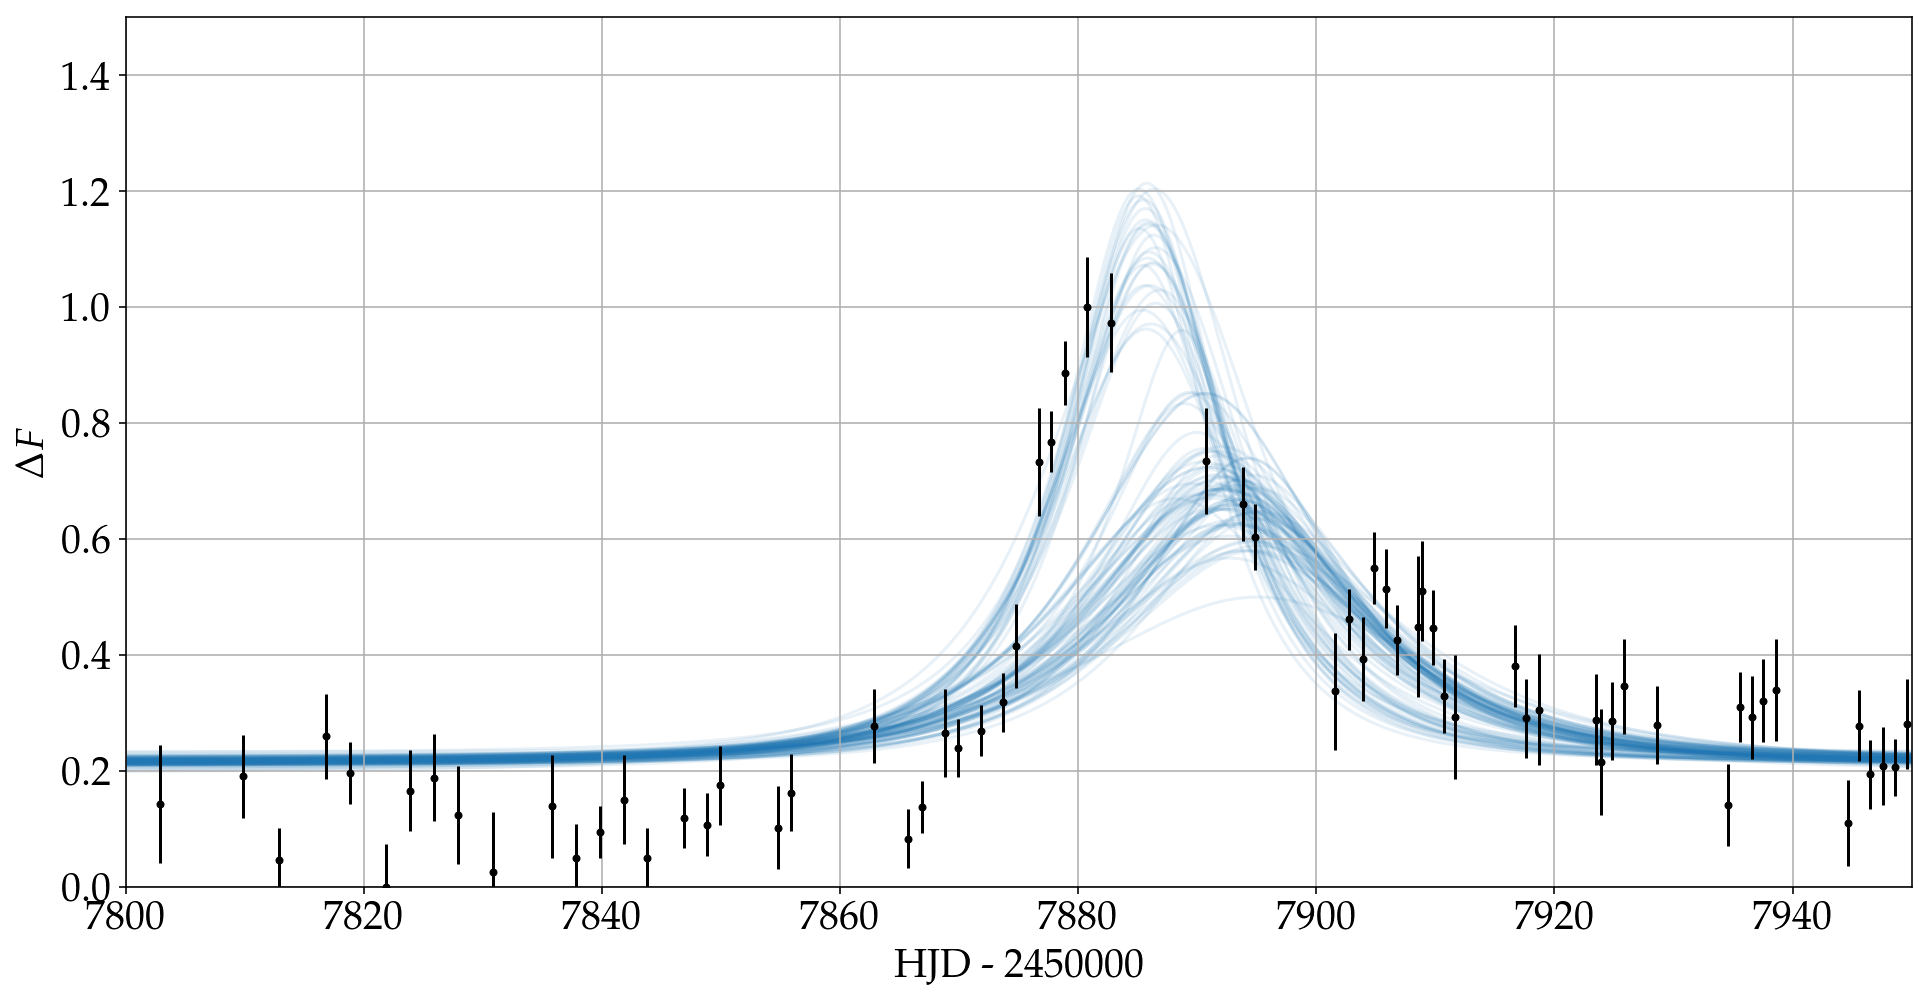

In [6]:
# Load the data, convert magnitudes to fluxes
data = np.loadtxt("../../../microlensing_data/OGLE/2017/blg-0831/phot.dat")
posterior_samples = np.loadtxt('posterior_sample.txt')

mag_to_flux = lambda m: 10**(-m/2.5)
magerr_to_fluxerr = lambda m, sigm: sigm*mag_to_flux(m)

t  = data[:, 0] - 2450000
sigF = magerr_to_fluxerr(data[:, 1], data[:, 2])
F = mag_to_flux(data[:, 1])

# Normalize flux units to unit interval
F_max = F.max()
F_min = F.min()
F = (F - F_min)/(F_max - F_min)
sigF = sigF/(F_max - F_min)

def espl_flux(t, pars):
    DeltaF, Fb, t0, u0, tE, rho  = pars

    tau = (t - t0)/tE
    A = np.zeros(len(tau))
    u = np.sqrt(u0**2 + tau**2)

    for i in range(len(tau)):
        A[i] = VBBL.ESPLMag2(u[i], rho)
        
    A_u0 = VBBL.ESPLMag2(u0, rho)

    return DeltaF*(A - 1)/(A_u0 - 1) + Fb    

def plot_data(ax, t, F, sigF):
    ax.errorbar(t, F, sigF, fmt='.', color='black')
    ax.grid(True)
    ax.set_xlabel('HJD - 2450000')
    ax.set_ylabel('$\Delta F$')

def triangle_plot(posterior_samples):
    lbls = [r'$\Delta F$', r'$F_b$', r'$t_0$', r'$u_0$', 
            r'$t_E$', r'$\rho$', r'$P_b$', r'$\mu_b$', r'$\sigma_b$']
    fig = corner.corner(posterior_samples, labels=lbls)

fig, ax = plt.subplots(figsize=(16,8))

x_grid = np.linspace(t[0], t[-1], 10000)

# Plot data
plot_data(ax, t, F, sigF)

# Plot model in data space
for pars in posterior_samples[:100]: # only plot 100 samples
    ax.plot(x_grid, espl_flux(x_grid, pars), 
             marker='', linestyle='-', color='C0', alpha=0.1, zorder=-10)
    
ax.set_xlim(7800,7950)
ax.set_ylim(0., 1.5)

(1434, 6)


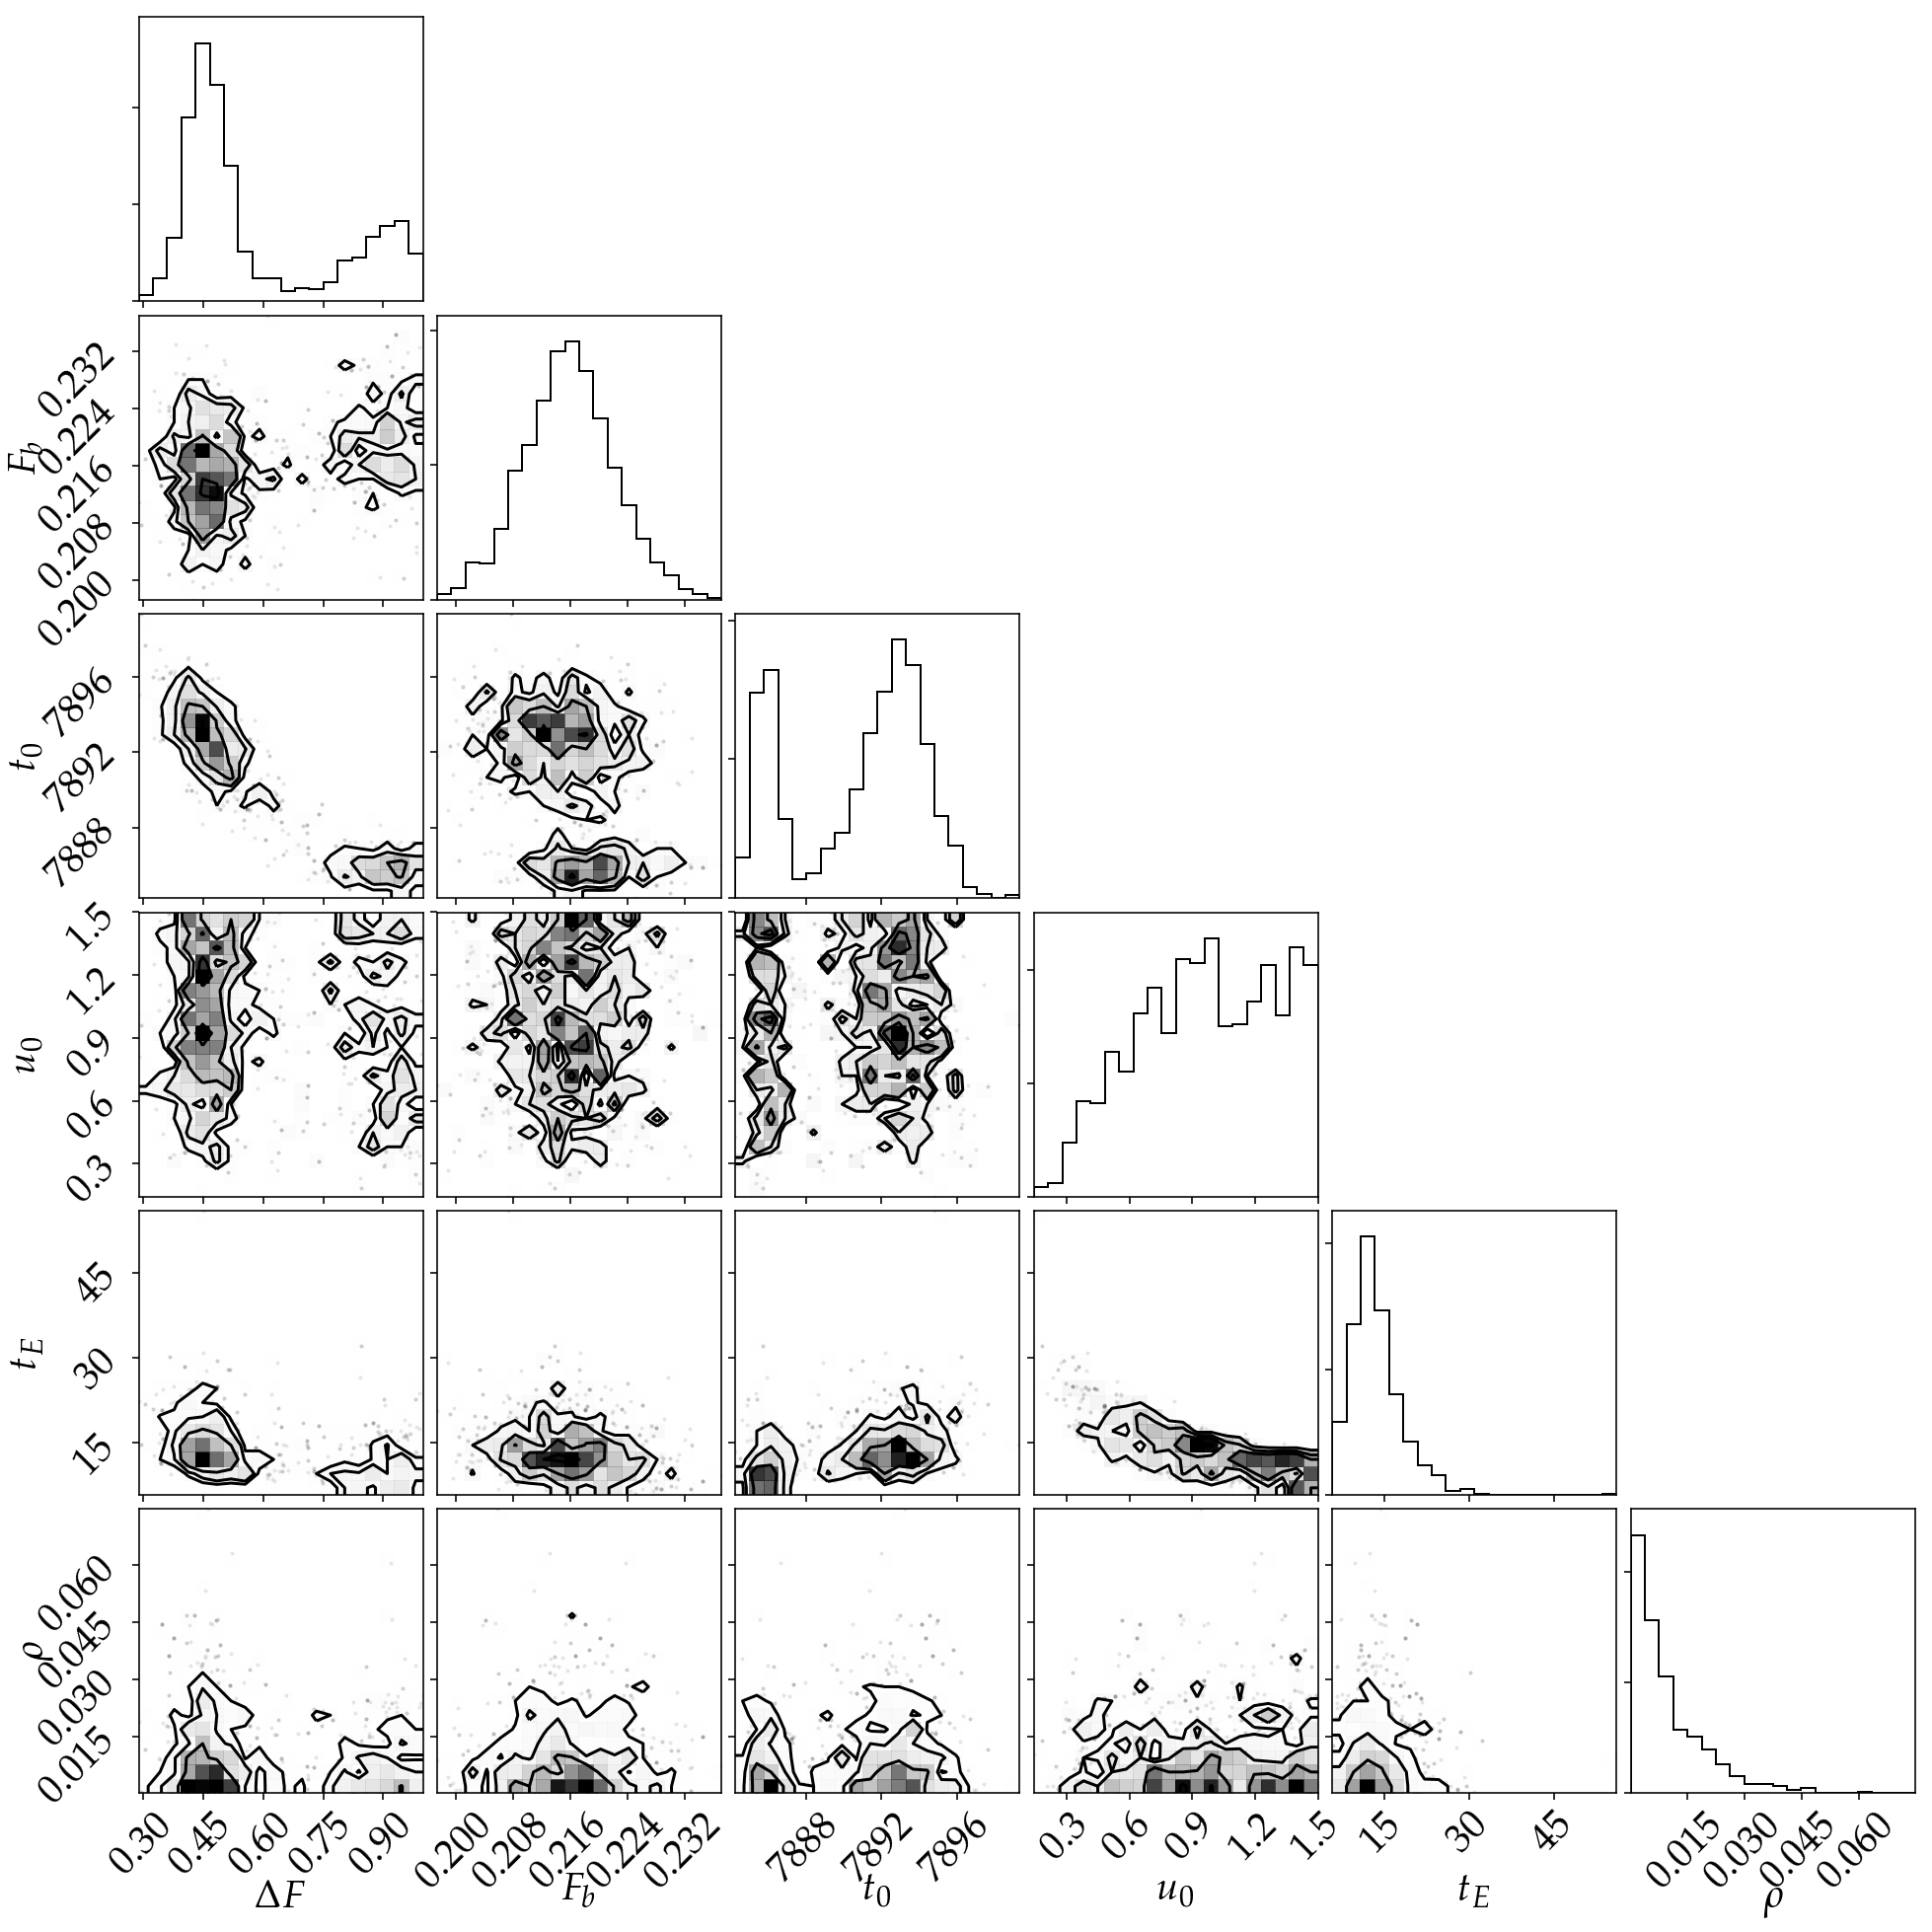

In [4]:
# Triangle plot
print(np.shape(posterior_samples))
triangle_plot(posterior_samples)